In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [28]:
maneuvers = pd.read_csv("maneuvers_cntrl_T8.csv")
#maneuvers.head()

In [29]:
maneuvers.describe()

,x,y,z,dx,dy,dz,dv_st
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,-0.991457,0.003326,0.000535,0.001314,0.006450,-0.001704,-2.194487e-07
std,0.000029,0.000029,0.000028,0.000029,0.000029,0.000029,1.019808e-04
min,-0.991507,0.003277,0.000485,0.001264,0.006400,-0.001753,-2.455222e-04
25%,-0.991484,0.003301,0.000514,0.001290,0.006425,-0.001729,-8.353207e-05
50%,-0.991457,0.003326,0.000536,0.001314,0.006450,-0.001705,-4.591273e-06
75%,-0.991432,0.003350,0.000559,0.001339,0.006474,-0.001678,8.811727e-05
max,-0.991408,0.003377,0.000585,0.001363,0.006500,-0.001654,2.241872e-04


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

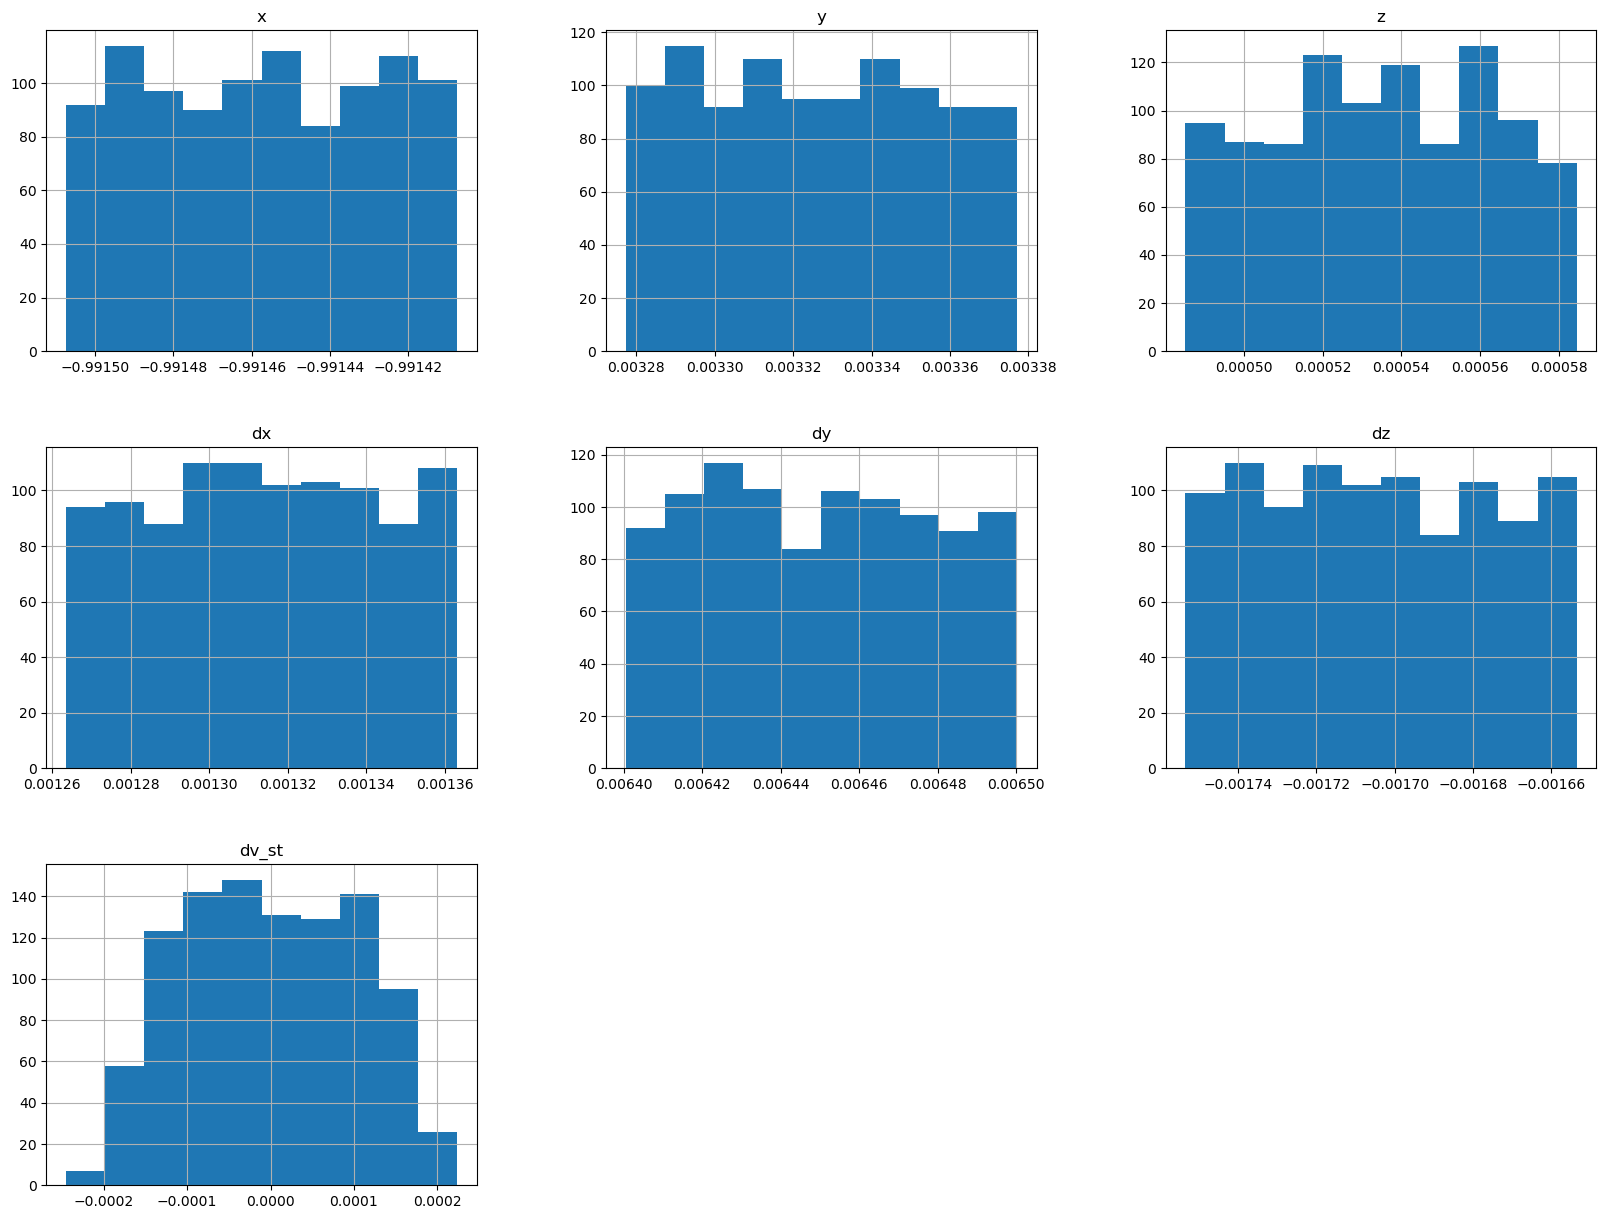

In [30]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Visualizing Data

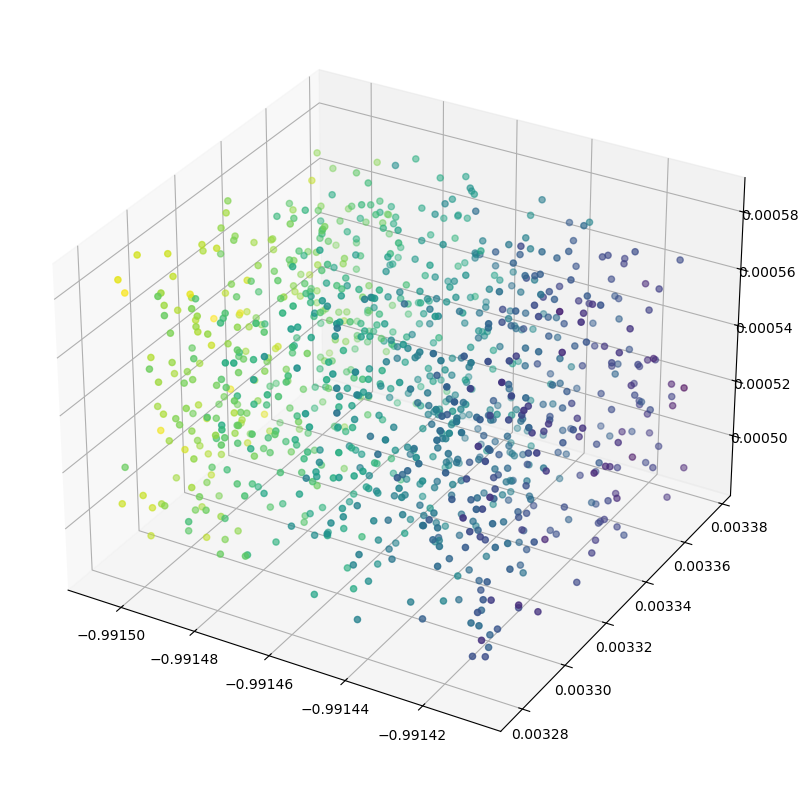

In [31]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [32]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
#maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
z        0.079692
dz      -0.022126
y       -0.127829
dx      -0.231991
dy      -0.239609
x       -0.947169
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='dx', ylabel='x'>, <Axes: xlabel='dy', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='dx', ylabel='y'>, <Axes: xlabel='dy', ylabel='y'>,
        <Axes: xlabel='dv_st', ylabel='y'>],
       [<Axes: xlabel='x', ylabel='dx'>, <Axes: xlabel='y', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dy', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dy'>, <Axes: xlabel='y', ylabel='dy'>,
        <Axes: xlabel='dx', ylabel='dy'>,
        <Axes: xlabel='dy', ylabel='dy'>,
        <Axes: xlabel='dv_st', ylabel='dy'>],
       [<Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='y', ylabel='dv_st'>,
        <Axes: xlabel='dx', ylabel='dv_st'>,
        <Axes: xlabel='dy', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', y

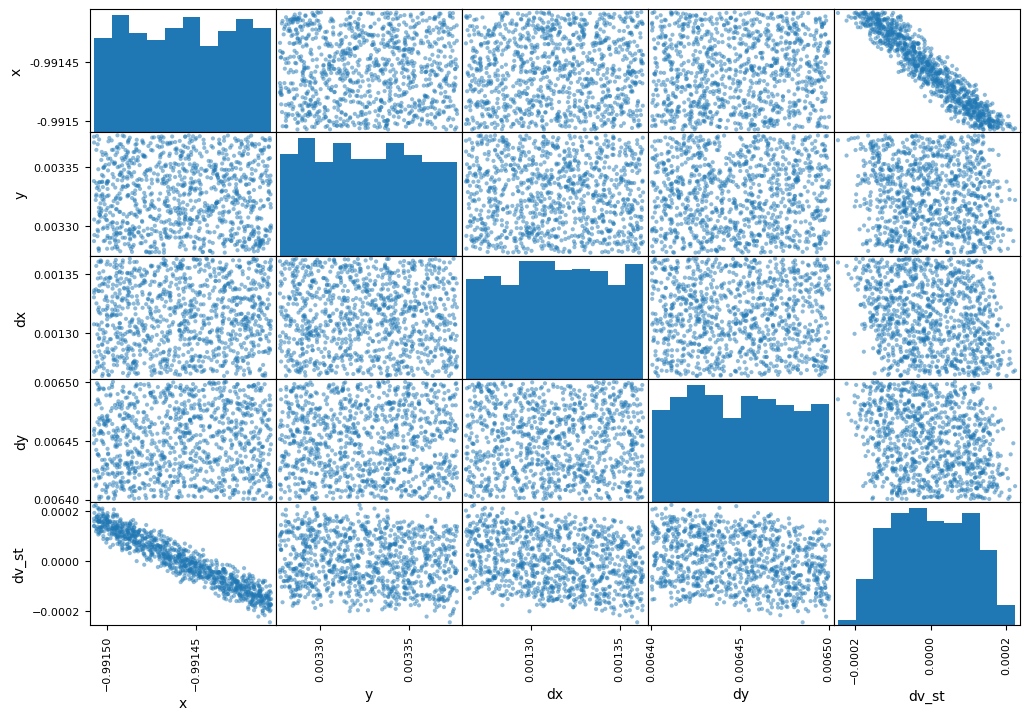

In [33]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "y", "dx", "dy", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

y, dx and dz are perfectly correlated!!!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [34]:
# Let's separate the predictors and the labels

# Drop dx and dz features, since they are almost proportional to y
#maneuvers_predictors = maneuvers.drop(["dx", "dz", "dv_st"], axis=1)

maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.991484,0.003327,0.000560,0.001267,0.006478,-0.001744
1,-0.991489,0.003342,0.000567,0.001351,0.006446,-0.001658
2,-0.991450,0.003332,0.000540,0.001298,0.006439,-0.001750
3,-0.991441,0.003277,0.000517,0.001361,0.006425,-0.001674
4,-0.991424,0.003304,0.000492,0.001341,0.006455,-0.001709


## Create Train/Test/Validation Sets

In [35]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(600, 6)
(200, 6)
(200, 6)


,x,y,z,dx,dy,dz
63,-0.991416,0.003284,0.000529,0.001343,0.006454,-0.001732
886,-0.991494,0.003363,0.000524,0.001296,0.006427,-0.001744
526,-0.991497,0.003335,0.000575,0.001341,0.006500,-0.001718
727,-0.991492,0.003324,0.000533,0.001316,0.006416,-0.001700
343,-0.991477,0.003292,0.000559,0.001296,0.006498,-0.001701


In [36]:
# Scale all the features. This transforms data type from dataframe to numpy array.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[0.91044226, 0.07143157, 0.44481664, 0.79641539, 0.5385938 ,
        0.21056322],
       [0.1309227 , 0.85488724, 0.39167378, 0.32896166, 0.26894392,
        0.09890845],
       [0.10712301, 0.5808827 , 0.8988578 , 0.77795053, 0.99973965,
        0.35378879],
       [0.15044325, 0.46334721, 0.48510659, 0.52497988, 0.15364572,
        0.53668638],
       [0.30791353, 0.14925405, 0.74554288, 0.32206934, 0.98166983,
        0.52956367]])

In [37]:
# Try PCA of data
from sklearn.decomposition import PCA
pca_pred = PCA(n_components=2, whiten=True)   # PCA of predictors
principalComponents_pred = pca_pred.fit_transform(X_train_scaled)
print('Explained variability per principal component: {}'.format(pca_pred.explained_variance_ratio_))

# X_train_scaled = pca_pred.transform(X_train_scaled)
# X_valid_scaled = pca_pred.transform(X_valid_scaled)
# X_test_scaled = pca_pred.transform(X_test_scaled)
# X_train_scaled[:5]

Explained variability per principal component: [0.1966855  0.18531407]


In [38]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)

<Figure size 640x480 with 0 Axes>

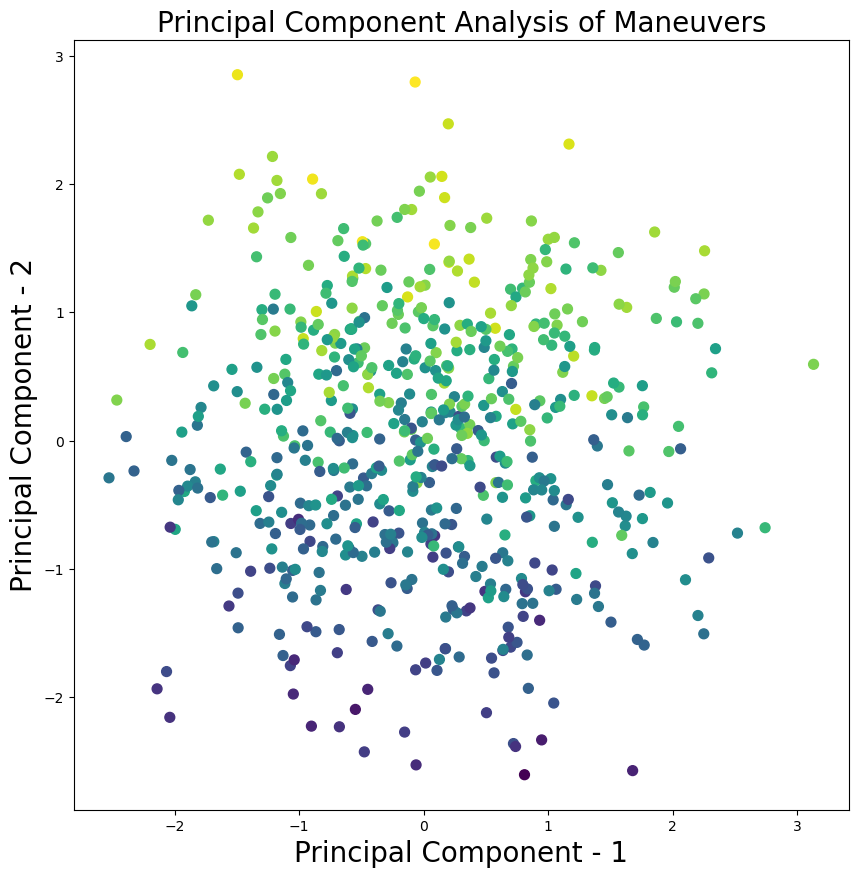

In [39]:
# Plot results of PCA
plt.figure()
plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Maneuvers",fontsize=20)
plt.scatter(principalComponents_pred[:, 0], principalComponents_pred[:, 1], c=y_train_scaled, s = 50)

From the above picture, it is seems that (PC1, PC2) only do not allow to distinguish dv. 

In [40]:
import joblib
joblib.dump(scaler, 'scaler_supervised.gz')
joblib.dump(scaler_target, 'scaler_target_supervised.gz')

['scaler_target_supervised.gz']

# Select and Train a Model

## Training and Evaluating on the Training Set

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
lin_reg.coef_

array([[-0.70580114, -0.11103982, -0.01450633, -0.16000738, -0.15592816,
         0.00562476]])

In [16]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.00038332152304607005

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [17]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [18]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.800599254276469, 0.27108421223098356, 0.4000756682061829, 0.8279303621332431, 0.4535337225484416, 0.29229323695557524, 0.2519413467991762, 0.824915937800307, 0.8347437768714107, 0.30179319486815803]
Labels: [array([0.88296917]), array([0.24482259]), array([0.36325124]), array([0.82894083]), array([0.46362586]), array([0.32962239]), array([0.22989012]), array([0.73557846]), array([0.91916816]), array([0.24789264])]


In [19]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.011175222080640389

## Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
print(maneuvers_pred_poly[0])
#poly_features.get_feature_names_out(['x','y','z','dy'])

[0.027689   0.34728613 0.1976901  0.54296403 0.55942219 0.47501654
 0.00076668 0.009616   0.00547384 0.01503413 0.01548984 0.01315273
 0.12060765 0.06865503 0.18856388 0.19427956 0.16496665 0.03908138
 0.10733862 0.11059223 0.09390607 0.29480994 0.30374613 0.2579169
 0.31295318 0.26573479 0.22564071]


In [21]:
my_lin_reg = LinearRegression()
my_lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
print(my_lin_reg.coef_)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

[[-7.01981447e-01 -1.09443342e-01 -1.17689875e-02 -1.58785239e-01
  -1.53467717e-01  6.13377557e-03  1.69236538e-03  3.13520575e-03
   4.74460404e-04  1.60488158e-04 -3.02194127e-04  4.49657307e-05
  -1.93902399e-03  1.88179735e-04  5.34957621e-04 -1.00455056e-03
   1.85963172e-05 -2.54801289e-03  8.96830489e-06 -1.77607510e-05
  -7.71762272e-04 -7.56093754e-05  2.87070413e-04 -3.98767130e-06
  -2.69126828e-04  8.70481902e-06 -2.82716961e-04]]


1.6810094106418355e-06

## SVM Regression

In [22]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05512242158987777

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [23]:
from sklearn.model_selection import cross_val_score
#tree_reg = DecisionTreeRegressor()
#forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, maneuvers_pred_poly, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
poly_rmse_scores = -scores

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(poly_rmse_scores)

Scores: [1.82111620e-06 1.73740683e-06 1.82230800e-06 1.86255545e-06
 1.89459419e-06]
Mean: 1.8275961348643347e-06
Standard deviation: 5.2754066437287414e-08


## Evaluate Model on Test Set

In [25]:
maneuvers_pred_poly = poly_features.fit_transform(X_test_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_test_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.8018735984030174e-06

## Persist model

In [26]:
# Persist the model for future use (see correction_module.py) without having to retrain.
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
with open("model_supervised.pkl", "wb") as f:
    dump(my_lin_reg, f, protocol=5)